In [27]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [28]:
import sys,os
import numpy as np

In [29]:
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.25)
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})

In [30]:
import mdtraj as md

# Condensed phase

### GSY/GSF replicates

<>:11: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_149343/2804231743.py:11: SyntaxWarning: invalid escape sequence '\l'
  ax[rep].plot(data[:,0]*1e-3, data[:,1], '.', ms=1, label='$\lambda=%i$'%lmbd)


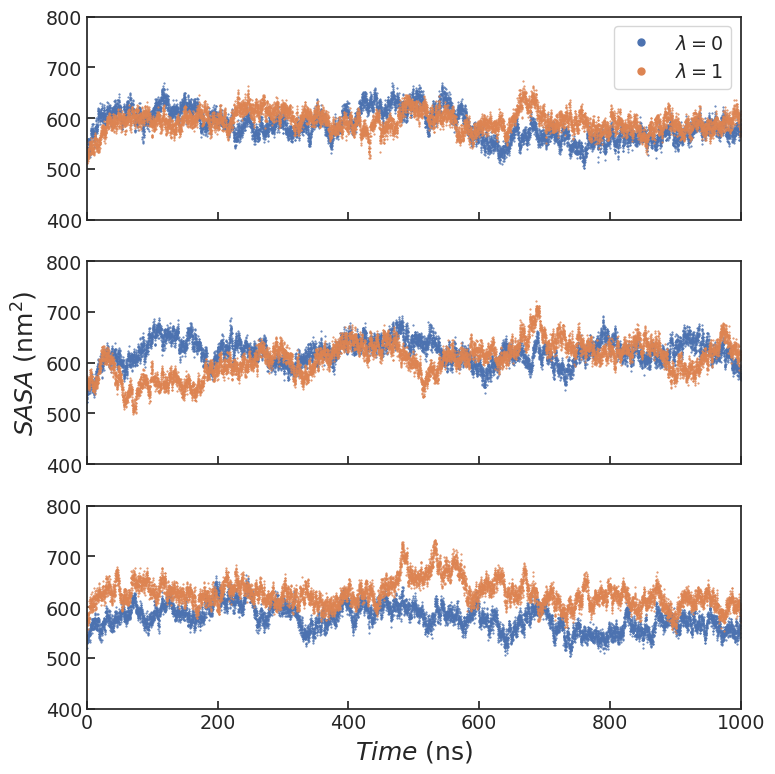

In [31]:
ff = 'amber99sb-star-ildnTRUE'
wat = 'tip3p' 
soup = "soup"

fig, ax = plt.subplots(3,1, figsize=(8,8), sharex=True, sharey=True)
for rep in range(3):
    for lmbd in [0,1]:        
        file = "../analysis/%s_%s_XXXL_%s_%s_rep%i_l%i_npt_sasa.xvg"%(proot, soup, ff, wat, rep, lmbd)
        try:
            data = np.loadtxt(file, comments=["#", "@"])
            ax[rep].plot(data[:,0]*1e-3, data[:,1], '.', ms=1, label='$\lambda=%i$'%lmbd)
        except Exception as e:
            print (e)

ax[1].set_ylabel(r'$SASA$ (nm$^2$)', fontsize=18)
ax[-1].set_xlabel(r'$Time$ (ns)', fontsize=18)        

lgnd = ax[0].legend(loc=1)
lgnd.legend_handles[0].set_markersize(10); lgnd.legend_handles[1].set_markersize(10); 

ax[-1].set_xlim(0, 1e6*1e-3)
ax[0].set_ylim(400,800)
plt.tight_layout()
plt.savefig("GGFGG_%s_%s_%s_sasa.png"%(soup, ff, wat))


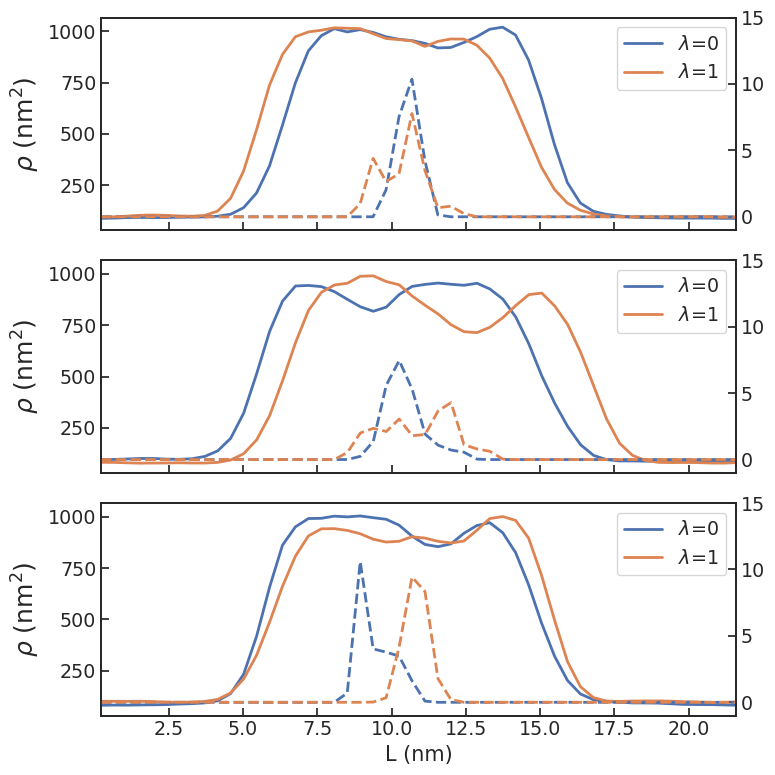

In [32]:
proot = 'GGFGG'
ff = 'amber99sb-star-ildnTRUE'
wat = 'tip3p' 
fig, ax = plt.subplots(3,1,figsize=(8,8), sharex=True, sharey=True)

for rep in range(3): 
    axt = ax[rep].twinx()
    for i in [0,1]:
        file = "../analysis/%s_%s_XXXL_%s_%s_rep%i_l%g_npt_density.xvg"%(proot, soup, ff, wat, rep, i)
        try:
            data = np.loadtxt(file, comments=["#", "@"])
            ax[rep].plot(data[:,0], data[:,1], '-', lw=2
                , color='C%i'%i, label=r'$\lambda$=%g'%i)
        except Exception as e:
            print (e)
        
        file = "../analysis/%s_%s_XXXL_%s_%s_rep%i_l%g_npt_densityF2Y.xvg"%(proot, soup, ff, wat, rep, i)
        try:
            data = np.loadtxt(file, comments=["#", "@"])
            axt.plot(data[:,0], data[:,1], '--', lw=2
                    , color='C%i'%i)
        except Exception as e:
            print (e)
        axt.set_ylim(-1,15)
        ax[rep].set_xlim(data[0,0], data[-1,0])
    ax[rep].set_ylabel(r'$\rho$ (nm$^2$)', fontsize=18)
    ax[rep].legend(loc=1)
    #ax.set_xlim(0,traj.time[-1])
#    ax[lmbda][-1].set_xlim(-180,180)
    #ax[lmbda][-1].set_ylim(-180,180)
#    ax[lmbda][-1].xaxis.set_ticks(range(-180,181,90))
    #ax[lmbda][-1].yaxis.set_ticks(range(-180,181,90))
    #plt.suptitle("%s"%prot.replace("F","(F2Y)"), fontsize=14)
ax[rep].set_xlabel('L (nm)')
plt.tight_layout()
plt.savefig("figures/GGFGG_%s_%s_%s_density.png"%(soup, ff, wat), dpi=300, \
                transparent=True)

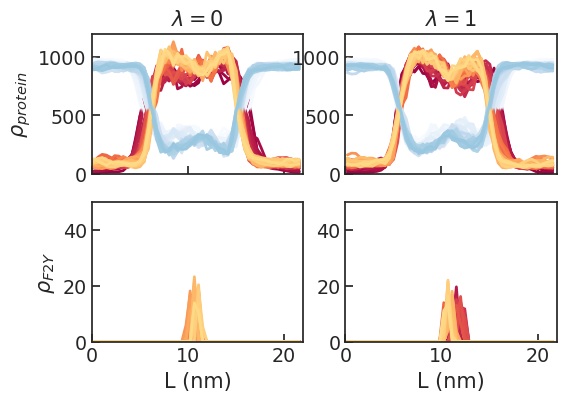

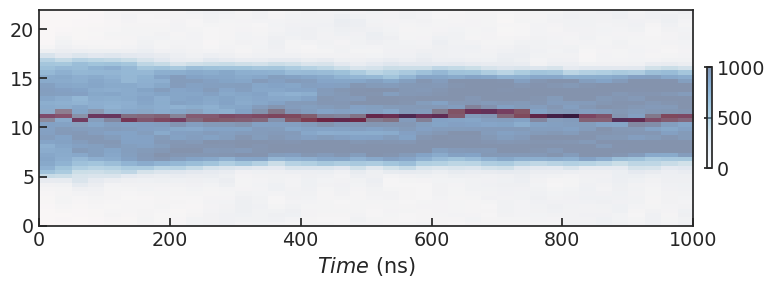

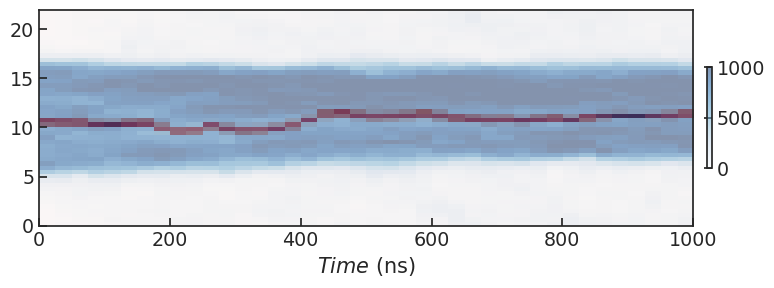

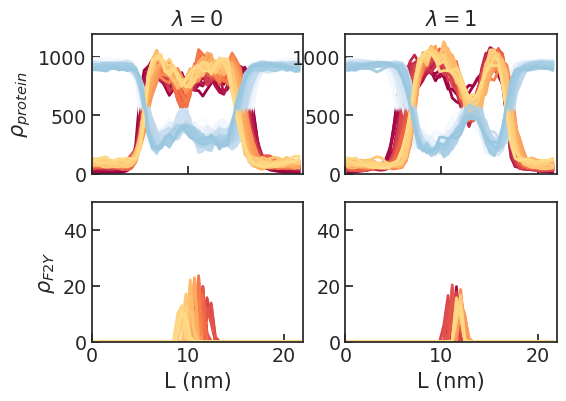

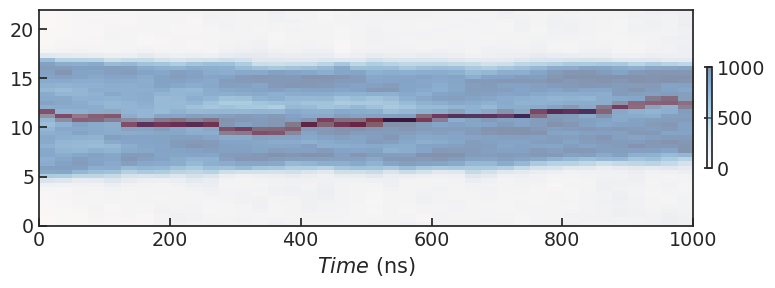

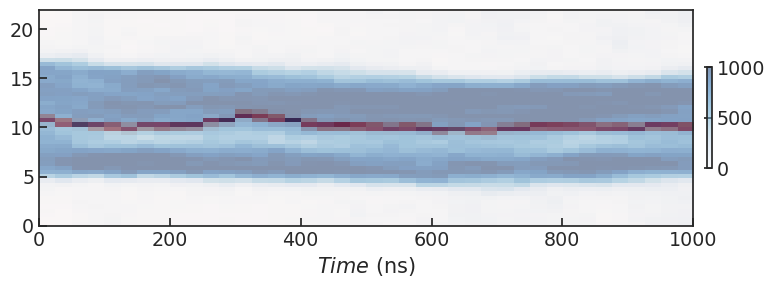

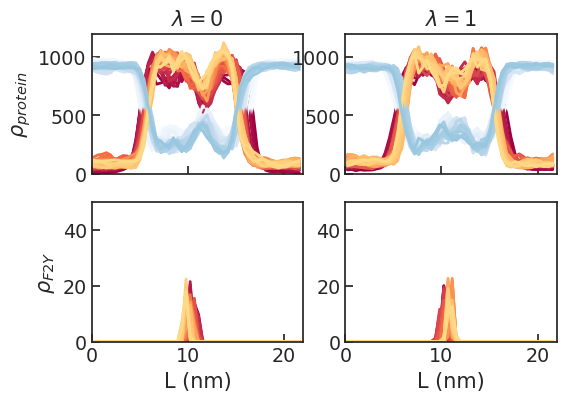

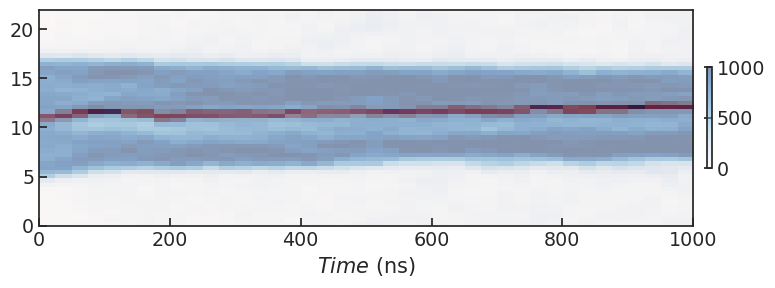

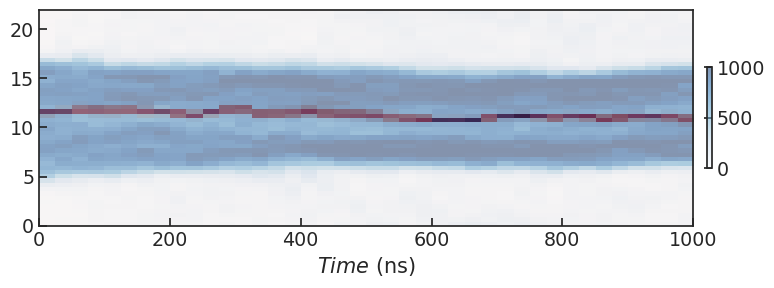

In [ ]:
proot = 'GGFGG'
ff = 'amber99sb-star-ildnTRUE'
wat = 'tip3p' 
for rep in range(3):
    fig, ax = plt.subplots(2,2, figsize=(6,4), sharex=True)
    for i in [0,1]:
        data = []
        dataH2O = []
        dataF2Y = []
        for k in range(40):
            file = "../analysis/%s_%s_XXXL_%s_%s_rep%i_l%g_npt_density_bin%i.xvg"%(proot, soup, ff, wat, rep, i, k)
            try:
                data.append(np.loadtxt(file, comments=["#", "@"]))
                ax[0][i].plot(data[-1][:,0], data[-1][:,1], '-', lw=2, color=plt.cm.Spectral(k/100))
            except Exception as e:
                print (e)
            file = "../analysis/%s_%s_XXXL_%s_%s_rep%i_l%g_npt_densityH2O_bin%i.xvg"%(proot, soup,ff, wat, rep, i, k)
            try:
                dataH2O.append(np.loadtxt(file, comments=["#", "@"]))
                ax[0][i].plot(dataH2O[-1][:,0], dataH2O[-1][:,1], '-', lw=2, color=plt.cm.Blues(k/100))
            except Exception as e:
                print (e)
            
            file = "../analysis/%s_%s_XXXL_%s_%s_rep%i_l%g_npt_densityF2Y_bin%i.xvg"%(proot, soup, ff, wat, rep, i, k)
            try:
                dataF2Y.append(np.loadtxt(file, comments=["#", "@"]))
                ax[1][i].plot(dataF2Y[-1][:,0], dataF2Y[-1][:,1], lw=2, color=plt.cm.Spectral(k/100))
            except Exception as e:
                print (e)
        ax[0][i].set_ylim(0,1200); ax[1][i].set_ylim(0,50)

        figim, axim = plt.subplots(figsize=(8,4))
        axim.imshow(np.vstack([x[:,1] for x in dataF2Y]).transpose(),  extent=[0,1000, 0, 22], \
              alpha=1, cmap='Reds')
        im = axim.imshow(np.vstack([x[:,1] for x in data]).transpose(), extent=[0,1000, 0, 22],\
              alpha=0.5, cmap='Blues', vmin=0, vmax=1000)
        axim.set_aspect(15)
        axim.set_xlabel('$Time$ (ns)')
        #divider = make_axes_locatable(axim)
        #cax = divider.append_axes('right', size='1%', pad=-5.3)
        #cbar = figim.colorbar(im, cax=cax)
        #cbar.ax.tick_params(labelsize=10)
        plt.colorbar(im,fraction=0.0075, pad=0.02)  
        plt.tight_layout()
        plt.savefig("figures/%s_%s_XXXL_%s_%s_rep%i_l%i_density.png"%(proot, soup, ff, wat, rep, i), \
                    dpi=300, transparent=True)

    ax[i][-1].set_xlim(0,22)
    ax[0][0].set_title(r'$\lambda=%i$'%0); ax[0][1].set_title(r'$\lambda=%i$'%1); 
    ax[-1][0].set_xlabel('L (nm)'); ax[-1][1].set_xlabel('L (nm)')
    ax[0][0].set_ylabel(r'$\rho_{protein}$'); ax[1][0].set_ylabel(r'$\rho_{F2Y}$')
    plt.tight_layout(h_pad=0)

    #masked_data = np.ma.masked_where(np.vstack([x[:,1] for x in dataF2Y]).transpose() == 0., \
    #                                 np.vstack([x[:,1] for x in dataF2Y]).transpose())
    #ax.imshow(masked_data,  extent=[0,500, 0, 22], \
    #          alpha=1, cmap='Reds')
    #ax.set_ylabel('$L$ (nm)')
    #ax.text(0.025,0.1,r'$\lambda=$%i'%i, fontsize=12, transform=ax.transAxes, \
    #       bbox=dict(edgecolor='k', facecolor='white', boxstyle='round', pad=0.2)) 
    #plt.savefig("figures/%s_soup_XXXL_%s_%s_l%i_density.png"%(proot,ff, wat, i), dpi=300, transparent=True)

In [ ]:
for rep in range(3):
    fig, ax = plt.subplots(2,5, figsize=(10,4), sharex=True, sharey=True)
    figg, axx = plt.subplots(2,1, figsize=(8,3), sharex=True, sharey=True)
    figgg, axxx = plt.subplots(2,1, figsize=(8,3), sharex=True, sharey=True)
    for lmbda in [0, 1]:
        pdb = "../data/%s_%s_XXXL_%s_%s_rep%g_l%i_npt_berendsen.gro"%(proot, soup, ff, wat, rep, lmbda)
        traj_pdb = md.load(pdb)
        atom_indices = traj_pdb.top.select("residue 1 to 7")
        
        xtc = "../data/%s_%s_XXXL_%s_%s_rep%g_l%i_npt_proc.xtc"%(proot, soup, ff, wat, rep, lmbda)

        traj = md.load_xtc(xtc, top=pdb, atom_indices=atom_indices)
        phi = md.compute_phi(traj)
        psi = md.compute_psi(traj)
        chi1= md.compute_chi1(traj)
        for k in range(5):
            counts, ybins, xbins, image = ax[lmbda][k].hist2d(180./np.pi*phi[1][:,k],180./np.pi*psi[1][:,k], \
                bins=[np.linspace(-180,180,30), np.linspace(-180,180,30)], \
                cmap='viridis_r', \
                norm=mpl.colors.LogNorm(), density=True)
            ax[lmbda][k].contour(np.transpose(counts), extent=[xbins.min(), xbins.max(), ybins.min(), ybins.max()], \
                  linewidths=1, levels = [1e-6, 3e-6, 1e-5, 3e-5, 1e-4], colors='white')
#            ax[lmbda][k].text(0.75, 0.8, "$%s_%g$"%(prot[k],k+1), fontsize=12, transform=ax[lmbda][k].transAxes)
        ax[lmbda][0].text(0.1,0.1, r'$\lambda$=%g'%lmbda, fontsize=14, transform=ax[lmbda][0].transAxes, \
                          bbox=dict(edgecolor='k', facecolor='lightgray', boxstyle='round'))
        ax[lmbda][0].set_ylabel(r'$\psi$', fontsize=18)        

        axx[lmbda].plot(traj.time*1e-3, psi[1][:,2]*180/np.pi, '.' , ms=1, c='C%i'%lmbda, label=r'$\lambda$=%g'%lmbda)
        axx[lmbda].text(0.05,0.15, r'$\lambda$=%g'%lmbda, fontsize=12, transform=axx[lmbda].transAxes, \
                          bbox=dict(edgecolor='k', facecolor='lightgray', boxstyle='round'))

        axxx[lmbda].plot(traj.time*1e-3, chi1[1][:,0]*180/np.pi, '.' , ms=1, c='C%i'%lmbda, label=r'$\lambda$=%g'%lmbda)
        axxx[lmbda].text(0.05,0.15, r'$\lambda$=%g'%lmbda, fontsize=12, transform=axx[lmbda].transAxes, \
                          bbox=dict(edgecolor='k', facecolor='lightgray', boxstyle='round'))
        
    axx[0].set_ylabel(r'$\psi$', fontsize=18); axx[1].set_ylabel(r'$\psi$', fontsize=18)
    axx[-1].set_xlabel(r'$Time (ns)$', fontsize=18)
    axx[0].set_ylim(-180,180); axx[0].set_xlim(0,1000)
    plt.tight_layout()
    plt.savefig("figures/%s_%s_XXXL_%s_%s_rep%i_l%i_phipsi.png"%(proot, soup, ff, wat, rep, i), \
            dpi=300, transparent=True)

    axxx[0].set_ylabel(r'$\chi_1$', fontsize=18); axxx[1].set_ylabel(r'$\chi_1$', fontsize=18)
    axxx[-1].set_xlabel(r'$Time (ns)$', fontsize=18)
    axxx[0].set_ylim(-180,180); axxx[0].set_xlim(0,1000)
    plt.tight_layout()
    plt.savefig("figures/%s_%s_XXXL_%s_%s_rep%i_l%i_chi1.png"%(proot, soup, ff, wat, rep, i), \
            dpi=300, transparent=True)

    [ax[1][k].set_xlabel(r'$\phi$', fontsize=18) for k in range(5)]
    ax[lmbda][-1].set_xlim(-180,180)
    ax[lmbda][-1].set_ylim(-180,180)
    ax[lmbda][-1].xaxis.set_ticks(range(-180,181,90))
    ax[lmbda][-1].yaxis.set_ticks(range(-180,181,90))
    plt.tight_layout()
    plt.savefig("figures/%s_%s_XXXL_%s_%s_rep%i_l%i_rama.png"%(proot, soup, ff, wat, rep, i), \
            dpi=300, transparent=True)